# Iris Example
## Pickle Viewer
This is the pickle viewer for the iris model. It is identical to the breast cancer model pickle viewer. Please feel free to play around with it to see how the model logs its results. To view the raw data from a pickle file just load the pickle file into a variable like **data = pickle.load(pickle_file)** then throw **data** into a cell and run it. 

In [23]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn import metrics

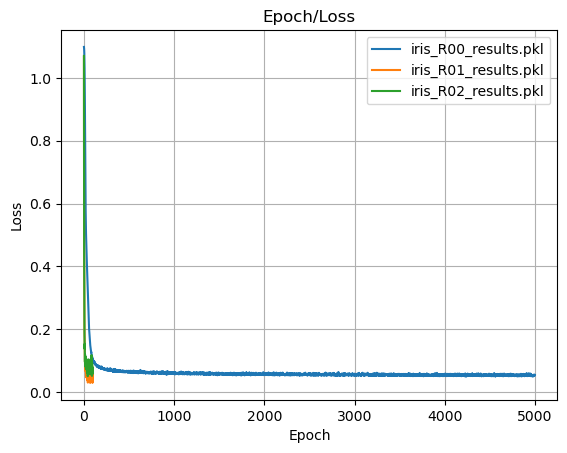

In [24]:
# Assume the directory for the results is a subdirectory of working directory.
directory ='./results' 
for filename in os.listdir(directory): # For each file in directory
    if filename.endswith('.pkl'): # Find files that are pickle files
        file_path = os.path.join(directory, filename) # Get the file path for those files
        with open(file_path, 'rb') as pickle_file: # Open the files
            data = pickle.load(pickle_file) # Grab the data from pickle
            plt.plot(data['history']['loss'], label=filename) # Grab the loss data and plot

# Set our labels and title for the graph
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch/Loss')
plt.grid(True) # This will enable the grid you can see in the graph below.
plt.legend() # Show the legend

# Saving functions, the reason you want png and pdf is because pdf can be resized without loss of quality for
# professional use while the png is for ease of access. 
plt.savefig("figures/iris_graph.png") 
plt.savefig("figures/iris_graph.pdf")
plt.show() # Show plot 

## Confusion Matrix
This is where we set up and display our confusion matrix, which shows classification errors easily and is a great way to look at how your model is doing.

In [25]:
# If you don't specify which file to open it would use the last one it plotted above. 
with open('results/iris_R00_results.pkl', 'rb') as pickle_file:
    data = pickle.load(pickle_file)

In [26]:
array = np.array(data['predict_testing'])
predictions = []

# Making a new array because sklearn really doesn't like sparse arrays. 
for x in array: 
    predictions.append(np.argmax(x))

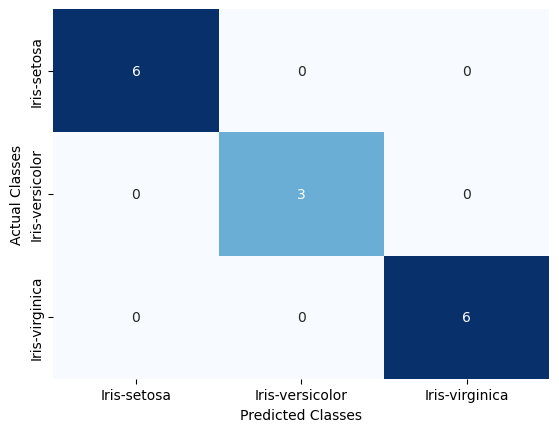

In [27]:
# We grab the predictions array from earlier and our true_values to make a proper confusion matrix
true_values = np.array(data['outs_testing'])
confusion_matrix = metrics.confusion_matrix(true_values, predictions)

# This gets an array of the output mapping labels.
output_mapping = dict(data['dataset']['categorical_translation'][0][1])
outputs = []
for key in output_mapping.keys():
    outputs.append(key)

# This creates the display for our confusion matrix. 
sns.heatmap(confusion_matrix, cmap='Blues', cbar=False, annot=True, fmt="d")

# y will tell how many squares the confusion matrix needs on each side. Outputs will label the ticks.
y = len(output_mapping.keys())
plt.xticks(np.arange(y)+0.5,outputs)
plt.yticks(np.arange(y)+0.5,outputs)

plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.savefig('figures/confusion_matrix.png')